In [13]:
# 03/04/2023 <---- Started working on
# Author: Pushpraj Katiyar
# email: pk825@snu.edu.in <--- for any query, reach out to this email
# Roll no: 2220120001

#let's import all useful packages

# dataset is provided in form of a zip file, to extract it let's import zipfile 
import zipfile
#To read extracted dataset csv, let's import panda 
import pandas as pd
import numpy as np
from numpy.linalg import inv, det
import matplotlib.pyplot as plt

# Let's import required sklearn lib methods,
# Documentation can be found at https://scikit-learn.org/
from sklearn.model_selection import train_test_split # <----- train_test_split Split arrays into random train and test subsets.
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import math

# getting some upcoming deprication warning due to installed python version. bit of non essencial code
import warnings
warnings.filterwarnings('ignore')

# Extract the CSV file from the ZIP file
with zipfile.ZipFile("MNIST_Dataset.zip", "r") as zip_ref:
    zip_ref.extractall("MNIST_Dataset")

In [14]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv("MNIST_Dataset/mnist.csv")

# Split features and target
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

# Preprocess the data
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [15]:
# Train an SVM model on the training set
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Use the trained model to make predictions on the training set and the testing set
svm_train_pred = svm_model.predict(X_train)
svm_test_pred = svm_model.predict(X_test)

# Calculate the training error and the testing error
svm_train_error = np.mean(svm_train_pred != y_train)
svm_test_error = np.mean(svm_test_pred != y_test)

# Calculate R(h) for SVM
r = 1 # constant
s = 1 # constant
d = X_train.shape[1] # number of features
delta = 0.1 # constant
m = X_train.shape[0] # number of samples
svm_Rh = svm_train_error + r*math.sqrt((2*math.log(d+1))/m) + s*math.sqrt((math.log(1/delta))/m)

# Train a Decision Tree model on the training set
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Use the trained model to make predictions on the training set and the testing set
dt_train_pred = dt_model.predict(X_train)
dt_test_pred = dt_model.predict(X_test)

# Calculate the training error and the testing error
dt_train_error = np.mean(dt_train_pred != y_train)
dt_test_error = np.mean(dt_test_pred != y_test)

# Calculate R(h) for Decision Tree
n = dt_model.tree_.node_count # number of nodes in the tree
dt_Rh = dt_train_error + math.sqrt((n+1)*math.log(d+3) + math.log(2/delta)/(2*m))

# Print the results
print("SVM:")
print("Training error:", svm_train_error)
print("Testing error:", svm_test_error)
print("Rh:", svm_Rh)
print("\n")
print("Decision Tree:")
print("Training error:", dt_train_error)
print("Testing error:", dt_test_error)
print("Rh:", dt_Rh)

SVM:
Training error: 0.011857142857142858
Testing error: 0.030571428571428572
Rh: 0.04752415873183319


Decision Tree:
Training error: 0.0
Testing error: 0.15714285714285714
Rh: 152.2457272399651


In [16]:
# Load the dataset
data = pd.read_csv("DataSet_4.csv", header=None)

# Given Λ matrix
Lambda = np.array([[1, 0], [0, 0.7]])

# Extract the data into x1 and x2 columns
x1 = data.iloc[:, 0]
x2 = data.iloc[:, 1]

# Combine x1 and x2 into a single matrix X
X = np.column_stack((x1, x2))

# Calculate the number of samples
m = X.shape[0]

# Calculate the sample mean vector
mu = np.mean(X, axis=0)

# Calculate the sample covariance matrix
S = np.cov(X.T)

# Calculate the MLE estimate of mu
mu_hat = mu.reshape(-1, 1) + (Lambda @ inv(Lambda + S/m)) @ ((X - mu).T)

print("MLE estimate of mu:")
print(mu_hat)

MLE estimate of mu:
[[0.16411389 0.85526175 0.88093706 ... 0.38322123 0.73882423 0.19276347]
 [3.56839458 3.70552948 2.40323228 ... 4.48629247 3.23060278 3.71217593]]


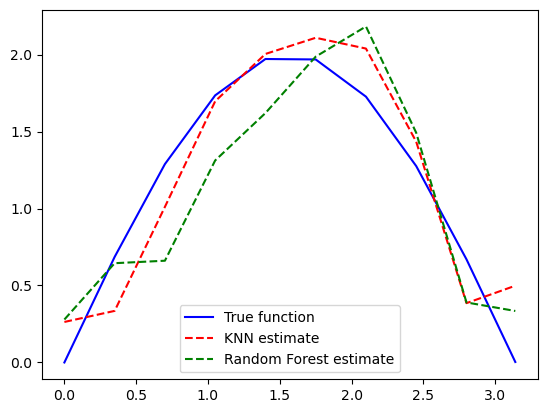

In [17]:
# Define the sample size and generate the data
N = 100
X = np.random.uniform(0, 3, size=(N,))
y = 2 * np.sin(X) + np.random.normal(0, 0.5, size=(N,))

# Define the test points
test_points = np.array([0, 0.35, 0.70, 1.05, 1.40, 1.75, 2.10, 2.45, 2.80, 3.14]).reshape(-1, 1)

# Define the KNN model and fit to the data
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X.reshape(-1, 1), y)

# Define the Random Forest model and fit to the data
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X.reshape(-1, 1), y)

# Predict the function values for the test points using the trained models
knn_pred = knn_model.predict(test_points)
rf_pred = rf_model.predict(test_points)

# Plot the estimated function values
plt.plot(test_points, 2*np.sin(test_points), 'b-', label='True function')
plt.plot(test_points, knn_pred, 'r--', label='KNN estimate')
plt.plot(test_points, rf_pred, 'g--', label='Random Forest estimate')
plt.legend(loc='best')
plt.show()


### >>>>>>>>>>> COMPLETE <<<<<<<<<<<<